In [ ]:
#imported all the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#Read the data set and defined the target variable
df = pd.read_csv ('loan_data.csv')
target ='Loan_Status'
df.head() #extracted the first five rows

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
1,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
2,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
3,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
4,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y


**Descriptive** **Analysis**

In [ ]:
#checked the size of our dataset for better understanding
df.shape

(381, 13)

In [ ]:
#checking the number of missing values by columns
[sum(df[i].isnull()) for i in df.columns]

[0, 5, 0, 8, 0, 21, 0, 0, 0, 11, 30, 0, 0]

In [ ]:
#checking the percentage of missing values by columnns
df.isnull().mean()*100

Loan_ID              0.000000
Gender               1.312336
Married              0.000000
Dependents           2.099738
Education            0.000000
Self_Employed        5.511811
ApplicantIncome      0.000000
CoapplicantIncome    0.000000
LoanAmount           0.000000
Loan_Amount_Term     2.887139
Credit_History       7.874016
Property_Area        0.000000
Loan_Status          0.000000
dtype: float64

In [ ]:
#calculated mode for all
modes = {
    'Married': df['Married'].mode(),
    'Gender': df['Gender'].mode(),
    'Dependents': df['Dependents'].mode(),
    'Education': df['Education'].mode(),
    'Self_Employed': df['Self_Employed'].mode(),
    'Property_Area': df['Property_Area'].mode(),
    'Credit_History': df['Credit_History'].mode()
}

mode_df = pd.DataFrame(modes).transpose()
mode_df.columns = ['Mode']
print(mode_df)

#With this, we can say that most of the loan applicants are males, graduates, non-dependents, are not self-employed,
#dwell in semi-urban areas, and are married males meeting the credit history guidelines

                     Mode
Married               Yes
Gender               Male
Dependents              0
Education        Graduate
Self_Employed          No
Property_Area   Semiurban
Credit_History        1.0


In [ ]:
#Generated descriptive statistics of the numerical columns of our DataFrame.
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,381.000000,381.000000,381.000000,370.000000,351.000000
mean,3579.845144,1277.275381,104.986877,340.864865,0.837607
std,1419.813818,2340.818114,28.358464,68.549257,0.369338
min,150.000000,0.000000,9.000000,12.000000,0.000000
25%,2600.000000,0.000000,90.000000,360.000000,1.000000
50%,3333.000000,983.000000,110.000000,360.000000,1.000000
75%,4288.000000,2016.000000,127.000000,360.000000,1.000000
max,9703.000000,33837.000000,150.000000,480.000000,1.000000


In [ ]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
1,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
2,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
3,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
4,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
376,LP002953,Male,Yes,3+,Graduate,No,5703,0.0,128.0,360.0,1.0,Urban,Y
377,LP002974,Male,Yes,0,Graduate,No,3232,1950.0,108.0,360.0,1.0,Rural,Y
378,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
379,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y


In [ ]:
#Made a correlation matrix of all the numerical variables
numeric_df = df.select_dtypes(include=['int64','float64'])
correlation_matrix= numeric_df.corr()
correlation_matrix

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
ApplicantIncome,1.000000,-0.248693,0.270681,-0.109875,0.004535
CoapplicantIncome,-0.248693,1.000000,0.114936,0.001906,0.023015
LoanAmount,0.270681,0.114936,1.000000,0.123579,-0.047899
Loan_Amount_Term,-0.109875,0.001906,0.123579,1.000000,-0.013452
Credit_History,0.004535,0.023015,-0.047899,-0.013452,1.000000


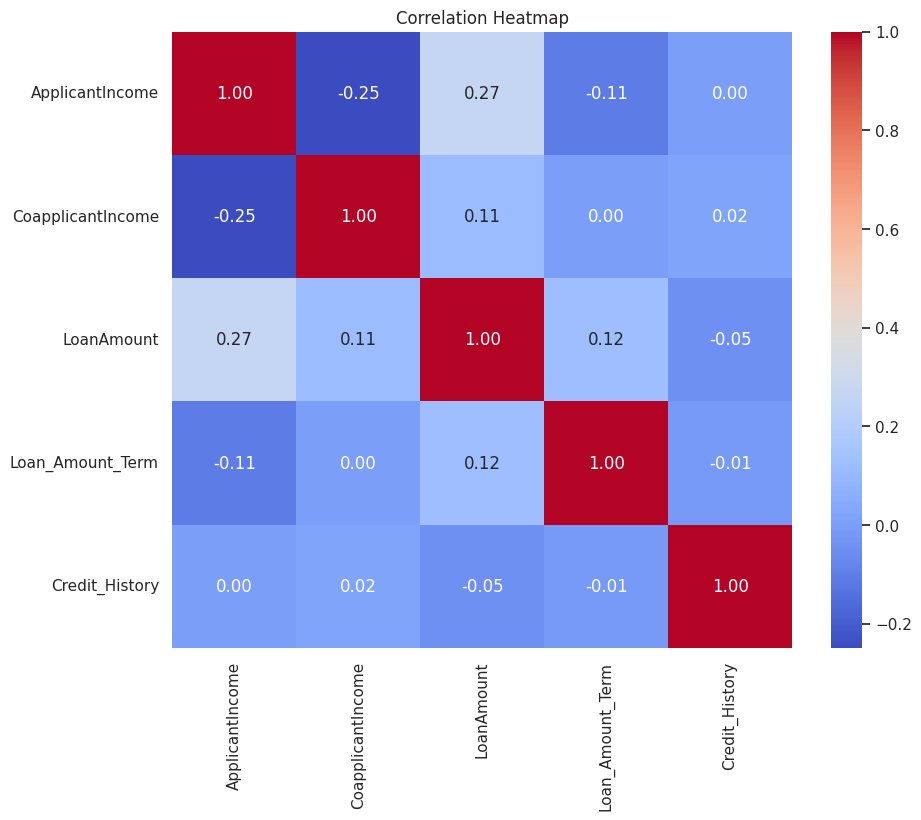

In [ ]:
#Created a heatmap using the correlation matrix
plt.figure(figsize=(10,8));
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm',fmt='.2f');
plt.title('Correlation Heatmap');
plt.show;

In [ ]:
#Calculated the variance for the numerical variables
variances = numeric_df.var()
variances

ApplicantIncome      2.015871e+06
CoapplicantIncome    5.479429e+06
LoanAmount           8.042025e+02
Loan_Amount_Term     4.699001e+03
Credit_History       1.364103e-01
dtype: float64

In [ ]:
#Found the outliers using IQR for each numerical column
Q1 = numeric_df.quantile(0.25)
Q3 = numeric_df.quantile(0.75)
IQR = Q3 - Q1
lower_bound= Q1 - 1.5* IQR
upper_bound = Q3 + 1.5*IQR
outliers = ((numeric_df < lower_bound) | (numeric_df > upper_bound)).sum()
print('Number of outliers in each numeric column:')
print(outliers)

Number of outliers in each numeric column:
ApplicantIncome      14
CoapplicantIncome     6
LoanAmount            7
Loan_Amount_Term     58
Credit_History       57
dtype: int64


<Figure size 1000x800 with 0 Axes>

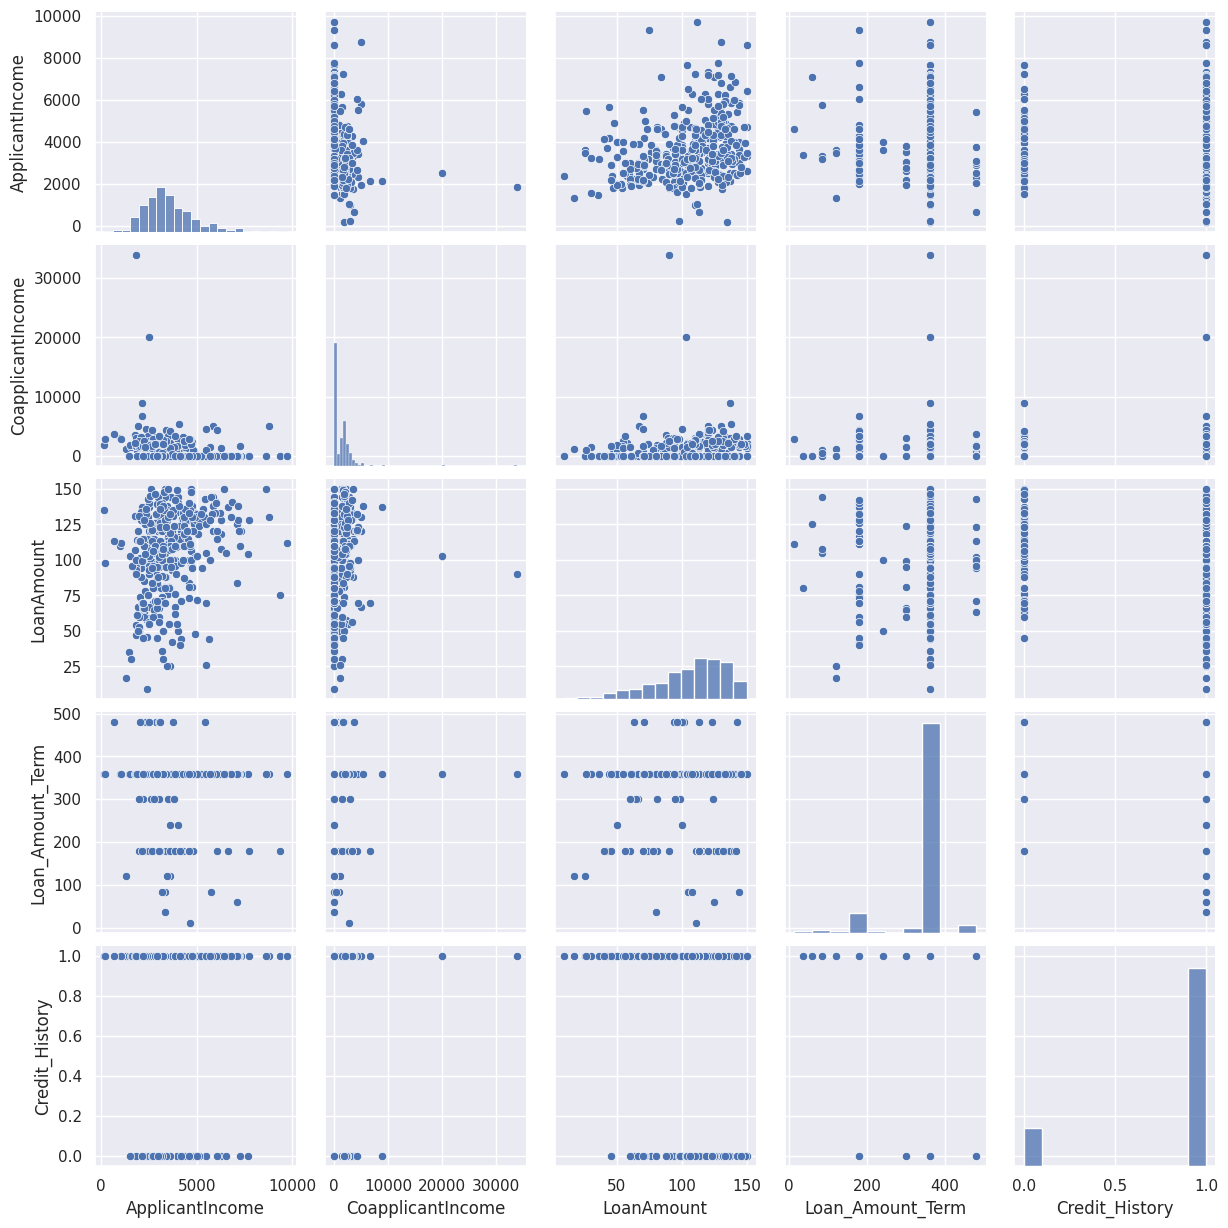

<Figure size 1000x800 with 0 Axes>

In [ ]:
#Made pair plots to vizualize relationships between all pairs of variables in our dataset
sns.pairplot(df)
plt.figure(figsize=(10,8))

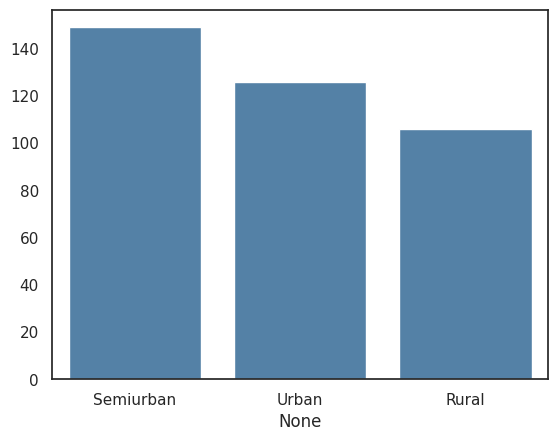

In [ ]:
#Visualized the count of different property areas
import seaborn as sns

sns.set(style='white')

barc=sns.barplot(x=df['Property_Area'].value_counts().index, y=df['Property_Area'].value_counts().values,color='steelblue')


In [ ]:
#computed the levels in the target variable
df['Loan_Status'].value_counts()

Y    271
N    110
Name: Loan_Status, dtype: int64

In [ ]:
#Calculated the average loan amount grouped by different property areas
df.groupby('Property_Area')['LoanAmount'].mean()

Property_Area
Rural        110.264151
Semiurban    106.805369
Urban         98.396825
Name: LoanAmount, dtype: float64

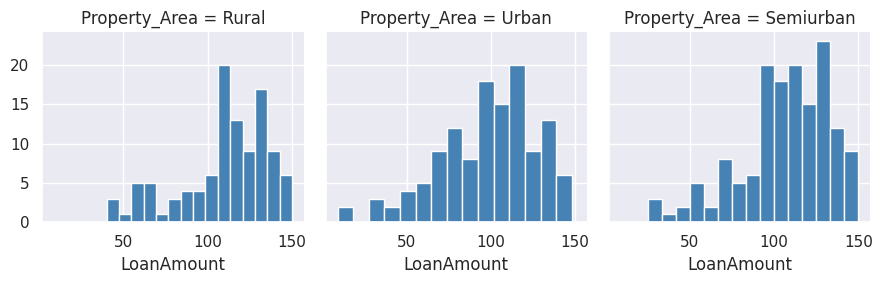

In [ ]:
#Distribution of loan amount based on different property areas
sns.set(style="darkgrid")
g= sns.FacetGrid(df, col="Property_Area", margin_titles=True)
ax= g.map(plt.hist, "LoanAmount", color="steelblue", bins=15)


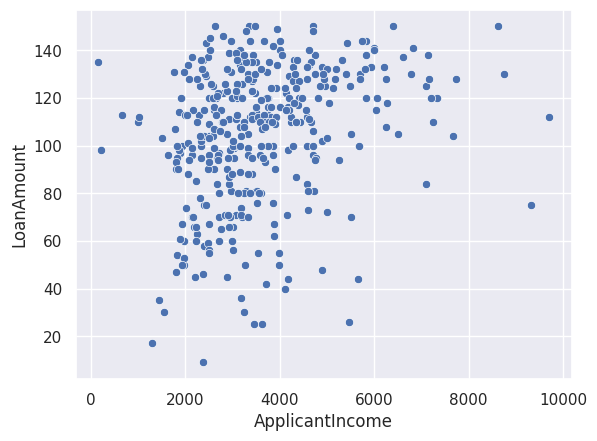

In [ ]:
#Assessed the correlation between the Applicant's Income and the Loan amount by plotting a scatter plot
ax= sns.scatterplot(x="ApplicantIncome", y="LoanAmount", data= df)

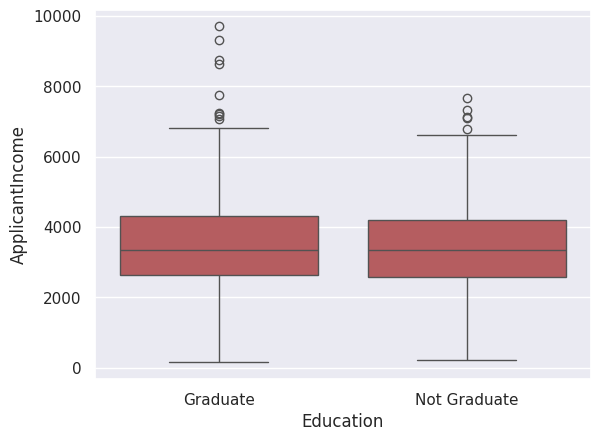

In [ ]:
#Made box-and-whisker plot to compare the distribution of Applicant Income amid different education categories
ax=sns.boxplot(y="ApplicantIncome", x="Education",color="r",data=df)

**Data Preprocessing**

In [ ]:
#Extracted the categorical variables excluding the target variable
categorical_var= list(set(df.dtypes[df.dtypes==object].index)-set(['Loan_Status']))
categorical_var


['Gender',
 'Loan_ID',
 'Dependents',
 'Education',
 'Property_Area',
 'Married',
 'Self_Employed']

In [ ]:
#created an empty list for categorical variables with 0 variation
zero_cardinality=[]
for i in categorical_var:
    if len(df[i].value_counts().index)==1:
        zero_cardinality.append(i)

In [ ]:
zero_cardinality

[]

In [ ]:
#created an empty list for categorical variables with high cardinality
high_cardinality=[]
for i in categorical_var:
    if len(df[i].value_counts().index)>200:
        high_cardinality.append(i)

In [ ]:
high_cardinality

['Loan_ID']

In [ ]:
#Dropped the variables with high cardinality
df=df.drop(high_cardinality,axis=1)

In [ ]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
1,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
2,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
3,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
4,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y


In [ ]:
#Extracted the numerical variables
numerical_var=list(df.select_dtypes(exclude=object).columns)

In [ ]:
#Converted the list of numerical variables into a data frame
df[numerical_var]

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
0,4583,1508.0,128.0,360.0,1.0
1,3000,0.0,66.0,360.0,1.0
2,2583,2358.0,120.0,360.0,1.0
3,6000,0.0,141.0,360.0,1.0
4,2333,1516.0,95.0,360.0,1.0
...,...,...,...,...,...
376,5703,0.0,128.0,360.0,1.0
377,3232,1950.0,108.0,360.0,1.0
378,2900,0.0,71.0,360.0,1.0
379,4106,0.0,40.0,180.0,1.0


In [ ]:
#Scaled the data set for ML Algorithms
from sklearn import preprocessing
#converted the numerical_df data frame into numpy array
array = df[numerical_var].values
data_scaler=preprocessing.MinMaxScaler(feature_range=(0,1))

In [ ]:
data_scaler.fit_transform(array)

array([[0.46404271, 0.0445666 , 0.84397163, 0.74358974, 1.        ],
       [0.2983356 , 0.        , 0.40425532, 0.74358974, 1.        ],
       [0.25468439, 0.06968703, 0.78723404, 0.74358974, 1.        ],
       ...,
       [0.28786769, 0.        , 0.43971631, 0.74358974, 1.        ],
       [0.41411075, 0.        , 0.21985816, 0.35897436, 1.        ],
       [0.46404271, 0.        , 0.87943262, 0.74358974, 0.        ]])

In [ ]:
#converted the numpy array into pandas dataframe
pd.DataFrame(data_scaler.fit_transform(array),columns=numerical_var)

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
0,0.464043,0.044567,0.843972,0.743590,1.0
1,0.298336,0.000000,0.404255,0.743590,1.0
2,0.254684,0.069687,0.787234,0.743590,1.0
3,0.612373,0.000000,0.936170,0.743590,1.0
4,0.228515,0.044803,0.609929,0.743590,1.0
...,...,...,...,...,...
376,0.581283,0.000000,0.843972,0.743590,1.0
377,0.322621,0.057629,0.702128,0.743590,1.0
378,0.287868,0.000000,0.439716,0.743590,1.0
379,0.414111,0.000000,0.219858,0.358974,1.0


In [ ]:
#Overrided the original data frame
df[numerical_var]=pd.DataFrame(data_scaler.fit_transform(array), columns=numerical_var)

In [ ]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,Yes,1,Graduate,No,0.464043,0.044567,0.843972,0.74359,1.0,Rural,N
1,Male,Yes,0,Graduate,Yes,0.298336,0.000000,0.404255,0.74359,1.0,Urban,Y
2,Male,Yes,0,Not Graduate,No,0.254684,0.069687,0.787234,0.74359,1.0,Urban,Y
3,Male,No,0,Graduate,No,0.612373,0.000000,0.936170,0.74359,1.0,Urban,Y
4,Male,Yes,0,Not Graduate,No,0.228515,0.044803,0.609929,0.74359,1.0,Urban,Y


In [ ]:
#For standardization we imported the StandardScaler module from sklearn
from sklearn.preprocessing import StandardScaler
#Created a new column for standardized values
new_col=[i+'_Standardized' for i in numerical_var]
data_standardized=StandardScaler().fit(array)
df[new_col]=pd.DataFrame(data_standardized.transform(array))

In [ ]:
df

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,ApplicantIncome_Standardized,CoapplicantIncome_Standardized,LoanAmount_Standardized,Loan_Amount_Term_Standardized,Credit_History_Standardized
0,Male,Yes,1,Graduate,No,0.464043,0.044567,0.843972,0.743590,1.0,Rural,N,0.707469,0.098695,0.812575,0.279522,0.440315
1,Male,Yes,0,Graduate,Yes,0.298336,0.000000,0.404255,0.743590,1.0,Urban,Y,-0.408932,-0.546371,-1.376596,0.279522,0.440315
2,Male,Yes,0,Not Graduate,No,0.254684,0.069687,0.787234,0.743590,1.0,Urban,Y,-0.703019,0.462294,0.530102,0.279522,0.440315
3,Male,No,0,Graduate,No,0.612373,0.000000,0.936170,0.743590,1.0,Urban,Y,1.706799,-0.546371,1.271595,0.279522,0.440315
4,Male,Yes,0,Not Graduate,No,0.228515,0.044803,0.609929,0.743590,1.0,Urban,Y,-0.879330,0.102118,-0.352629,0.279522,0.440315
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
376,Male,Yes,3+,Graduate,No,0.581283,0.000000,0.843972,0.743590,1.0,Urban,Y,1.497342,-0.546371,0.812575,0.279522,0.440315
377,Male,Yes,0,Graduate,No,0.322621,0.057629,0.702128,0.743590,1.0,Rural,Y,-0.245316,0.287767,0.106391,0.279522,0.440315
378,Female,No,0,Graduate,No,0.287868,0.000000,0.439716,0.743590,1.0,Rural,Y,-0.479457,-0.546371,-1.200050,0.279522,0.440315
379,Male,Yes,3+,Graduate,No,0.414111,0.000000,0.219858,0.358974,1.0,Rural,Y,0.371067,-0.546371,-2.294635,-2.349882,0.440315


In [ ]:
#Dropped the original numerical variables
df=df.drop(numerical_var,axis=1)


In [ ]:
df

,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status,ApplicantIncome_Standardized,CoapplicantIncome_Standardized,LoanAmount_Standardized,Loan_Amount_Term_Standardized,Credit_History_Standardized
0,Male,Yes,1,Graduate,No,Rural,N,0.707469,0.098695,0.812575,0.279522,0.440315
1,Male,Yes,0,Graduate,Yes,Urban,Y,-0.408932,-0.546371,-1.376596,0.279522,0.440315
2,Male,Yes,0,Not Graduate,No,Urban,Y,-0.703019,0.462294,0.530102,0.279522,0.440315
3,Male,No,0,Graduate,No,Urban,Y,1.706799,-0.546371,1.271595,0.279522,0.440315
4,Male,Yes,0,Not Graduate,No,Urban,Y,-0.879330,0.102118,-0.352629,0.279522,0.440315
...,...,...,...,...,...,...,...,...,...,...,...,...
376,Male,Yes,3+,Graduate,No,Urban,Y,1.497342,-0.546371,0.812575,0.279522,0.440315
377,Male,Yes,0,Graduate,No,Rural,Y,-0.245316,0.287767,0.106391,0.279522,0.440315
378,Female,No,0,Graduate,No,Rural,Y,-0.479457,-0.546371,-1.200050,0.279522,0.440315
379,Male,Yes,3+,Graduate,No,Rural,Y,0.371067,-0.546371,-2.294635,-2.349882,0.440315


In [ ]:
#Checked the missing values in the data
for col in df.columns:
    print(col,df[col].isnull().sum())

Gender 5
Married 0
Dependents 8
Education 0
Self_Employed 21
Property_Area 0
Loan_Status 0
ApplicantIncome_Standardized 0
CoapplicantIncome_Standardized 0
LoanAmount_Standardized 0
Loan_Amount_Term_Standardized 11
Credit_History_Standardized 30


In [ ]:
#Extracted the processed numerical variables
numerical_v=list(df.select_dtypes(exclude=object).columns)
numerical_v

['ApplicantIncome_Standardized',
 'CoapplicantIncome_Standardized',
 'LoanAmount_Standardized',
 'Loan_Amount_Term_Standardized',
 'Credit_History_Standardized']

In [ ]:
#Imputed the missing values in the extracted numerical variables
df[numerical_v]=df[numerical_v].fillna(df[numerical_v].median())

In [ ]:
#Extracted the categorical variables
categorical_v=list(set(df.dtypes[df.dtypes==object].index)-set(['Loan_Status']))
categorical_v

['Gender',
 'Dependents',
 'Education',
 'Property_Area',
 'Married',
 'Self_Employed']

In [ ]:
#Imputed the missing values in the extracted categorical variables
for i in categorical_v:
    mode_i=df[i].mode()[0]
    df[i].fillna(mode_i,inplace=True)

In [ ]:
#Checked the missing values in the data to ensure that the above method worked
for col in df.columns:
    print(col,df[col].isnull().sum())

Gender 0
Married 0
Dependents 0
Education 0
Self_Employed 0
Property_Area 0
Loan_Status 0
ApplicantIncome_Standardized 0
CoapplicantIncome_Standardized 0
LoanAmount_Standardized 0
Loan_Amount_Term_Standardized 0
Credit_History_Standardized 0


In [ ]:
#Created dummy variables using onehot encoding
dummy_cat_df=pd.get_dummies(df[categorical_v])


In [ ]:
dummy_cat_df.head()

,Gender_Female,Gender_Male,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Education_Graduate,Education_Not Graduate,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,Married_No,Married_Yes,Self_Employed_No,Self_Employed_Yes
0,0,1,0,1,0,0,1,0,1,0,0,0,1,1,0
1,0,1,1,0,0,0,1,0,0,0,1,0,1,0,1
2,0,1,1,0,0,0,0,1,0,0,1,0,1,1,0
3,0,1,1,0,0,0,1,0,0,0,1,1,0,1,0
4,0,1,1,0,0,0,0,1,0,0,1,0,1,1,0


In [ ]:
#Dropped the categorical variables from the df
df= df.drop(categorical_v,axis=1)
#Converted the boolean data type into integer
dummy_cat_df=dummy_cat_df.astype(int)
#Added the newly created dummy variables instead
df=pd.concat([df,dummy_cat_df],axis=1)

In [ ]:
df.head()

,Loan_Status,ApplicantIncome_Standardized,CoapplicantIncome_Standardized,LoanAmount_Standardized,Loan_Amount_Term_Standardized,Credit_History_Standardized,Gender_Female,Gender_Male,Dependents_0,Dependents_1,...,Dependents_3+,Education_Graduate,Education_Not Graduate,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,Married_No,Married_Yes,Self_Employed_No,Self_Employed_Yes
0,N,0.707469,0.098695,0.812575,0.279522,0.440315,0,1,0,1,...,0,1,0,1,0,0,0,1,1,0
1,Y,-0.408932,-0.546371,-1.376596,0.279522,0.440315,0,1,1,0,...,0,1,0,0,0,1,0,1,0,1
2,Y,-0.703019,0.462294,0.530102,0.279522,0.440315,0,1,1,0,...,0,0,1,0,0,1,0,1,1,0
3,Y,1.706799,-0.546371,1.271595,0.279522,0.440315,0,1,1,0,...,0,1,0,0,0,1,1,0,1,0
4,Y,-0.879330,0.102118,-0.352629,0.279522,0.440315,0,1,1,0,...,0,0,1,0,0,1,0,1,1,0


In [ ]:
#Converted the target variable into a binary format
df.loc[df['Loan_Status']=='N','Loan_Status']=0
df.loc[df['Loan_Status']=='Y','Loan_Status']=1

In [ ]:
df['Loan_Status']

0      0
1      1
2      1
3      1
4      1
      ..
376    1
377    1
378    1
379    1
380    0
Name: Loan_Status, Length: 381, dtype: object

In [ ]:
#Computed the levels in the target variable
df.Loan_Status.value_counts()

1    271
0    110
Name: Loan_Status, dtype: int64

In [ ]:
df['Loan_Status']= df['Loan_Status'].astype(int)


In [ ]:
pip install imblearn

In [ ]:
#Used the smote technique for balancing the data
from imblearn.over_sampling import SMOTE

In [ ]:
# Created the SMOTE object
os = SMOTE(random_state=0)

# Defined the input variables
input_var = list(set(df.columns) - set(['Loan_Status']))

# Oversampled the data
X,Y = os.fit_resample(df[input_var], df['Loan_Status'])

# Converted arrays to DataFrames
X = pd.DataFrame(X, columns=input_var)
Y = pd.DataFrame(Y, columns=['Loan_Status'])

# Combined X and Y DataFrames
df = pd.concat([X, Y], axis=1)



In [ ]:
df

,Married_No,Self_Employed_Yes,Married_Yes,Gender_Female,Property_Area_Urban,Dependents_0,Property_Area_Rural,Dependents_2,Gender_Male,Education_Graduate,...,Self_Employed_No,Loan_Amount_Term_Standardized,LoanAmount_Standardized,ApplicantIncome_Standardized,Dependents_3+,Credit_History_Standardized,CoapplicantIncome_Standardized,Property_Area_Semiurban,Dependents_1,Loan_Status
0,0,0,1,0,0,0,1,0,1,1,...,1,0.279522,0.812575,0.707469,0,0.440315,0.098695,0,1,0
1,0,1,1,0,1,1,0,0,1,1,...,0,0.279522,-1.376596,-0.408932,0,0.440315,-0.546371,0,0,1
2,0,0,1,0,1,1,0,0,1,0,...,1,0.279522,0.530102,-0.703019,0,0.440315,0.462294,0,0,1
3,1,0,0,0,1,1,0,0,1,1,...,1,0.279522,1.271595,1.706799,0,0.440315,-0.546371,0,0,1
4,0,0,1,0,1,1,0,0,1,0,...,1,0.279522,-0.352629,-0.879330,0,0.440315,0.102118,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
537,1,0,0,1,0,1,0,0,0,1,...,0,0.279522,0.362098,0.881549,0,-2.271100,-0.546371,1,0,0
538,0,0,1,0,0,0,1,0,1,1,...,1,0.279522,1.503596,-0.130495,0,-2.271100,0.232445,0,0,0
539,0,0,1,0,0,0,0,0,1,1,...,1,0.279522,0.921059,0.719386,0,0.440315,-0.231621,0,0,0
540,1,0,0,1,0,0,0,0,0,0,...,0,0.279522,-1.154564,0.529403,0,0.440315,-0.546371,1,1,0


In [ ]:
#Computed the levels in the target variable after balancing the data set
df.Loan_Status.value_counts()

0    271
1    271
Name: Loan_Status, dtype: int64

In [ ]:
#saved the processed data set
df.to_csv('loan_data_processed.csv',index=False)

In [ ]:
#Performed Variable Selection in Python using Filter Method - Correlation Analysis
corr_matrix = df.corr().abs()
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
threshold = 0.6
correlated_features = [column for column in upper.columns if any(upper[column] > threshold)]
df_filtered = df.drop(correlated_features, axis=1)


In [ ]:
df_filtered

,Married_No,Self_Employed_Yes,Gender_Female,Property_Area_Urban,Dependents_0,Property_Area_Rural,Dependents_2,Education_Graduate,Loan_Amount_Term_Standardized,LoanAmount_Standardized,ApplicantIncome_Standardized,Dependents_3+,Credit_History_Standardized,CoapplicantIncome_Standardized,Property_Area_Semiurban,Dependents_1,Loan_Status
0,0,0,0,0,0,1,0,1,0.279522,0.812575,0.707469,0,0.440315,0.098695,0,1,0
1,0,1,0,1,1,0,0,1,0.279522,-1.376596,-0.408932,0,0.440315,-0.546371,0,0,1
2,0,0,0,1,1,0,0,0,0.279522,0.530102,-0.703019,0,0.440315,0.462294,0,0,1
3,1,0,0,1,1,0,0,1,0.279522,1.271595,1.706799,0,0.440315,-0.546371,0,0,1
4,0,0,0,1,1,0,0,0,0.279522,-0.352629,-0.879330,0,0.440315,0.102118,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
537,1,0,1,0,1,0,0,1,0.279522,0.362098,0.881549,0,-2.271100,-0.546371,1,0,0
538,0,0,0,0,0,1,0,1,0.279522,1.503596,-0.130495,0,-2.271100,0.232445,0,0,0
539,0,0,0,0,0,0,0,1,0.279522,0.921059,0.719386,0,0.440315,-0.231621,0,0,0
540,1,0,1,0,0,0,0,0,0.279522,-1.154564,0.529403,0,0.440315,-0.546371,1,1,0


In [ ]:
#Saved the final processed data set for fitting Machine Learning Models
df_filtered.to_csv('loan_data_processedF.csv',index=False)

In [ ]:
#Read the data set
df_loan= pd.read_csv('loan_data_processedF.csv')
target= 'Loan_Status' #defined the target variable
df_loan.head() #extracted the first five rows

,Married_No,Self_Employed_Yes,Gender_Female,Property_Area_Urban,Dependents_0,Property_Area_Rural,Dependents_2,Education_Graduate,Loan_Amount_Term_Standardized,LoanAmount_Standardized,ApplicantIncome_Standardized,Dependents_3+,Credit_History_Standardized,CoapplicantIncome_Standardized,Property_Area_Semiurban,Dependents_1,Loan_Status
0,0,0,0,0,0,1,0,1,0.279522,0.812575,0.707469,0,0.440315,0.098695,0,1,0
1,0,1,0,1,1,0,0,1,0.279522,-1.376596,-0.408932,0,0.440315,-0.546371,0,0,1
2,0,0,0,1,1,0,0,0,0.279522,0.530102,-0.703019,0,0.440315,0.462294,0,0,1
3,1,0,0,1,1,0,0,1,0.279522,1.271595,1.706799,0,0.440315,-0.546371,0,0,1
4,0,0,0,1,1,0,0,0,0.279522,-0.352629,-0.879330,0,0.440315,0.102118,0,0,1


In [ ]:
#Fitted the Linear Regression Model
from sklearn.linear_model import LinearRegression

input_col= list(set(df_loan.columns)-set(['Loan_Status'])) #determined the input variables
model = LinearRegression() #created a linear regression stance and kept every argument as default
#this was a predictive model object and we fitted this model

model.fit(df_loan[input_col], df_loan[target]) #fitted the data to find the model coefficients

print('Model coefficients:')
print(model.coef_)


print('\n')

#Calculated the R2 value to assess the performance of the linear regression model
print('R2 Value: ' + str(round(100*model.score(df_loan[input_col],df_loan[target]),2)))

print('\n')

#Built a new dataframe containing the actual target values, the predicted target values and the error(Residuals)=(Actual-Predicted)
pred_vs_actual= pd.DataFrame()
pred_vs_actual['actual']=df_loan[target]

#Used our fitted model to predict new values
pred_vs_actual['predicted']=np.round(model.predict(df_loan[input_col]),0)
pred_vs_actual['error']=pred_vs_actual['actual']-pred_vs_actual['predicted']
pred_vs_actual


Model coefficients:
[-0.08127606  0.02775407  0.31046715  0.01156005  0.35573067  0.29113636
  0.4013656   0.07134939 -0.05306322  0.04941877 -0.02450949  0.3597117
  0.21364649  0.00736655  0.46314407  0.32617704]


R2 Value: 47.96




,actual,predicted,error
0,0,1.0,-1.0
1,1,1.0,0.0
2,1,1.0,0.0
3,1,1.0,0.0
4,1,1.0,0.0
...,...,...,...
537,0,0.0,0.0
538,0,-0.0,0.0
539,0,0.0,0.0
540,0,1.0,-1.0


In [ ]:
#Converted the actual and predicted values into numpy arrays
actual_array = pred_vs_actual['actual'].values
predicted_array = pred_vs_actual['predicted'].values
error_array= actual_array - predicted_array

Text(0.5, 1.0, 'Histogram of Error')

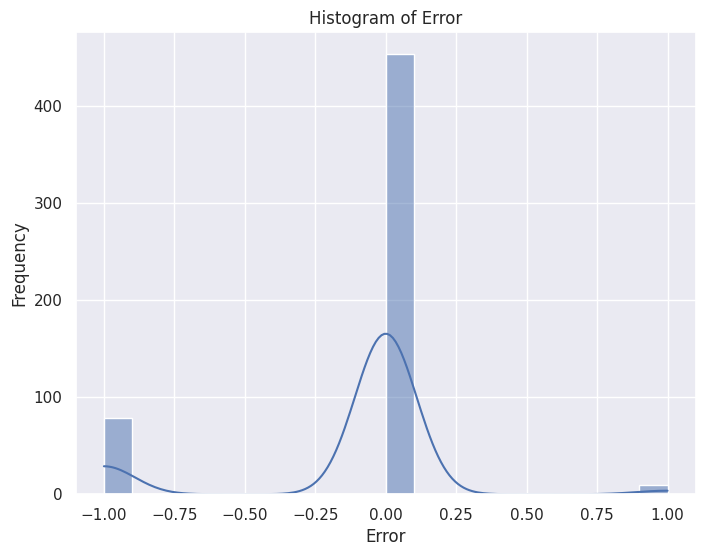

In [ ]:
#After building linear regression model, we assessed the distribution of the errors

plt.figure(figsize=(8, 6)) #Determined the figure size
sns.histplot(error_array, bins=20, kde=True)
#Plotted the frequency of error
plt.xlabel('Error')
plt.ylabel('Frequency')
plt.title('Histogram of Error')


#it seems like the corresponding residual plot is reasonably random
#there no trend or an issue, from a residual plot point of view the model isn't that bad

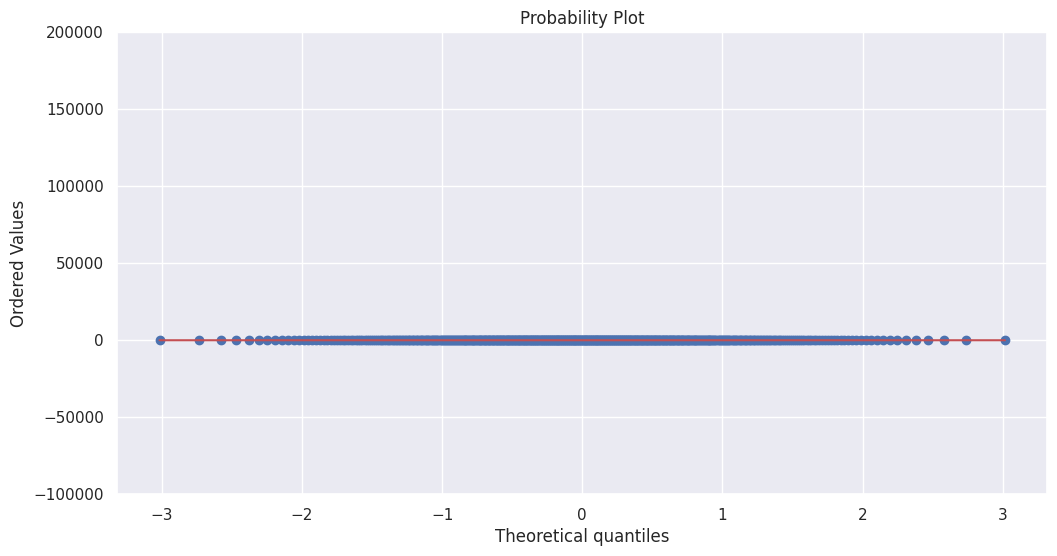

In [ ]:
#We then checked the normality assumption for this by building a quantile plot
import scipy as sp
fig, ax= plt.subplots(figsize=(12,6)) #determined the figure size

_, (_,_,r)= sp.stats.probplot(pred_vs_actual['error'], plot=ax, fit=True) #Generated the normality plot

limits = ax.set(ylim=(-100000,200000)) #set the limits for the graph

 #Used this plot to compare two probability distributions by plotting the quantiles against each other
 #in order to assess whether the variable follows a specific theoretical distribution

**Predictive Modeling**

In [ ]:
df_loan= pd.read_csv('loan_data_processedF.csv') #read the data set ready for predictive modeling
input_variables= df.columns.difference(['Loan_Status'])
#we seperated our input and output variables
X= df[input_variables]
Y=df['Loan_Status']


In [ ]:
#We split our data set into training and testing data
#to build a predictive model using a training data set
#and then we assessed the performance of that model
#using the test data set
models = ['LogisticReg', 'DecisionTree', 'RandomForest', 'KNN']

In [ ]:
#set the test size as the percentage of the original data set that will be used for testing
#and set the seed using random state to ensure that the same sequence of random numbers is generated every time the code runs.
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.33, random_state=42)

In [ ]:
#Logistic Regression Model
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(random_state=0,solver='lbfgs',multi_class='ovr')
lr.fit(X_train,Y_train);


In [ ]:
#Decision Trees Classifier Model
from sklearn.tree import DecisionTreeClassifier
dt= DecisionTreeClassifier(criterion = 'gini', splitter='best', max_depth=15)
dt.fit(X_train,Y_train);

In [ ]:
#Random Forests Classifier Model
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(n_estimators=200, max_depth=5,random_state=0)
rf.fit(X_train,Y_train);

In [ ]:
#K-Nearest Neighbour Machine Learning Algorithm
from sklearn.neighbors import KNeighborsClassifier
knn= KNeighborsClassifier(n_neighbors = 5)
knn.fit(X_train,Y_train);

In [ ]:
#Made Predictions and Model Assessment

In [ ]:
lr.predict(X_test)

array([1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0,
       1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1,
       0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1,
       1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1,
       0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1,
       0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 0])

In [ ]:
Y_test.values

array([1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0,
       1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1,
       0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       0, 0, 0])

In [ ]:
#computed the confusion matrix and performance indicators
def get_performance(actual_Y, pred_Y):
    cm = confusion_matrix(actual_Y, pred_Y)
    total = sum(sum(cm))
    accuracy = (cm[0,0]+cm[1,1])/total
    sensitivity = cm[0,0]/(cm[0,0]+cm[0,1])
    specificity = cm[1,1]/ (cm[1,0]+cm[1,1])
    return accuracy, sensitivity, specificity

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test.values, lr.predict(X_test))
sum(sum(cm))

179

In [ ]:
confusion_matrix (Y_test.values, lr.predict(X_test))


array([[74, 20],
       [ 6, 79]])

In [ ]:
#We found the predicted output variables using all the models
pred_Y_lr = lr.predict(X_test)
pred_Y_dt = dt.predict(X_test)
pred_Y_rf = rf.predict(X_test)
pred_Y_knn = knn.predict(X_test)

In [ ]:
dt.predict(X_test)

array([1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1,
       0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0,
       1, 1, 0])

In [ ]:
rf.predict(X_test)

array([1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1,
       1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1,
       0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 0])

In [ ]:
pip install --upgrade scikit-learn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 41.4 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.2
    Uninstalling scikit-learn-1.2.2:
      Successfully uninstalled scikit-learn-1.2.2


In [ ]:
X_test

,ApplicantIncome_Standardized,CoapplicantIncome_Standardized,Credit_History_Standardized,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Education_Graduate,Education_Not Graduate,Gender_Female,Gender_Male,LoanAmount_Standardized,Loan_Amount_Term_Standardized,Married_No,Married_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,Self_Employed_No,Self_Employed_Yes
360,-0.296798,-0.349172,0.440315,0,0,1,0,1,0,0,1,0.106391,-3.752232,0,1,0,0,1,1,0
73,-1.064104,-0.223838,0.440315,0,0,0,1,0,1,0,1,-0.387938,2.032459,0,1,0,1,0,1,0
353,1.565750,-0.546371,0.440315,1,0,0,0,0,1,0,1,0.953812,0.279522,1,0,0,1,0,0,1
86,0.707469,-0.546371,0.440315,1,0,0,0,1,0,1,0,-0.741030,0.279522,0,1,1,0,0,1,0
237,-0.360270,-0.546371,0.440315,1,0,0,0,1,0,0,1,-1.200050,2.032459,1,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
268,-1.241120,0.188953,0.440315,1,0,0,0,1,0,0,1,-0.176083,0.279522,0,1,0,0,1,1,0
182,-0.356039,0.487104,0.440315,1,0,0,0,1,0,0,1,1.200976,0.279522,0,1,1,0,0,1,0
94,-0.916003,-0.546371,0.440315,0,0,1,0,0,1,0,1,0.282937,0.279522,0,1,1,0,0,1,0
185,1.295642,-0.546371,-2.271100,1,0,0,0,1,0,1,0,1.342213,2.032459,1,0,0,0,1,1,0


In [ ]:
knn.predict(X_test)

array([1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0,
       1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1,
       0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1,
       0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1,
       1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 0])

In [ ]:
#Y_test is our actual Y

In [ ]:
#Used 4 different indicators (True Positive, True Negative, False Positive and False Negative) to calculate the
#accuracy, sensitivity and specificity for all the models

#accuracy, sensitivity and specificity for model lr
accuracy_lr, sensitivity_lr, specificity_lr = get_performance(Y_test, pred_Y_lr)

#accuracy, sensitivity and specificity for model dt
accuracy_dt, sensitivity_dt, specificity_dt = get_performance(Y_test, pred_Y_dt)

#accuracy, sensitivity and specificity for model rf
accuracy_rf, sensitivity_rf, specificity_rf = get_performance(Y_test, pred_Y_rf)

#accuracy, sensitivity and specificity for model knn
accuracy_knn, sensitivity_knn, specificity_knn = get_performance(Y_test, pred_Y_knn)

In [ ]:
#Built a dataframe using the performance indicators to compare the models easily

perf= pd.DataFrame([accuracy_lr,accuracy_dt,accuracy_rf,accuracy_knn],
                   columns=['Accuracy'], index=['Logistic Regression', ' Decision Tree', ' Random Forest','k-NN'])

In [ ]:
perf

,Accuracy
Logistic Regression,0.854749
Decision Tree,0.787709
Random Forest,0.815642
k-NN,0.804469


In [ ]:
#Stored the sensitivity and specificity values in the dataframe perf
perf['sensitivity']=np.asarray([sensitivity_lr,sensitivity_dt,sensitivity_rf,sensitivity_knn])
perf['specificity']=np.asarray([specificity_lr,specificity_dt,specificity_rf,specificity_knn])
perf

,Accuracy,sensitivity,specificity
Logistic Regression,0.854749,0.787234,0.929412
Decision Tree,0.787709,0.797872,0.776471
Random Forest,0.815642,0.680851,0.964706
k-NN,0.804469,0.765957,0.847059


In [ ]:
#Used Cross Validation for providing an estimate of how well each model is expected to perform on unseen data.
#The mean accuracy represents the average accuracy across all folds of the cross-validation,
#while the standard deviation indicates the variability or consistency of the model's performance.
from sklearn.model_selection import cross_val_score
models = [lr, knn, rf, dt]
model_names = ['Logistic Regression', 'K-NN', 'Random Forest', 'Decision Tree']
for model, name in zip(models, model_names):
    scores = cross_val_score(model, X_train, Y_train, cv=5)  # 5-fold cross-validation
    print(f"{name}: Mean Accuracy: {scores.mean():.2f}, Standard Deviation: {scores.std():.2f}")

Logistic Regression: Mean Accuracy: 0.80, Standard Deviation: 0.01
K-NN: Mean Accuracy: 0.80, Standard Deviation: 0.05
Random Forest: Mean Accuracy: 0.80, Standard Deviation: 0.04
Decision Tree: Mean Accuracy: 0.75, Standard Deviation: 0.06


In [ ]:
#Made a ROC Curve to see how our selected Logistic Regression model is going to perform with
#varing levels of thresholds to be able to distinguish 0s from 1s.
from sklearn.metrics import roc_curve, auc

In [ ]:
score_Y_lr= lr.predict_proba(X_test)
score_Y_lr

array([[8.64754893e-02, 9.13524511e-01],
       [3.27246582e-01, 6.72753418e-01],
       [2.00194262e-01, 7.99805738e-01],
       [2.20499361e-01, 7.79500639e-01],
       [6.35135408e-01, 3.64864592e-01],
       [3.68433816e-01, 6.31566184e-01],
       [8.04897532e-02, 9.19510247e-01],
       [9.86609293e-01, 1.33907073e-02],
       [9.91245241e-01, 8.75475901e-03],
       [9.98420190e-01, 1.57981032e-03],
       [2.99856980e-01, 7.00143020e-01],
       [5.80543002e-01, 4.19456998e-01],
       [9.96893757e-01, 3.10624290e-03],
       [5.69425151e-02, 9.43057485e-01],
       [5.61383680e-01, 4.38616320e-01],
       [1.81927473e-01, 8.18072527e-01],
       [6.12342786e-01, 3.87657214e-01],
       [1.64488852e-01, 8.35511148e-01],
       [9.94286148e-01, 5.71385189e-03],
       [2.18837322e-01, 7.81162678e-01],
       [3.54977971e-01, 6.45022029e-01],
       [9.27431575e-01, 7.25684247e-02],
       [3.65243369e-01, 6.34756631e-01],
       [1.91198572e-01, 8.08801428e-01],
       [7.579958

In [ ]:
score_Y_lr= lr.predict_proba(X_test)
fpr, tpr, _ = roc_curve(Y_test, score_Y_lr[:,1])
roc_auc = auc(fpr,tpr)

In [ ]:
roc_auc

0.9138923654568211

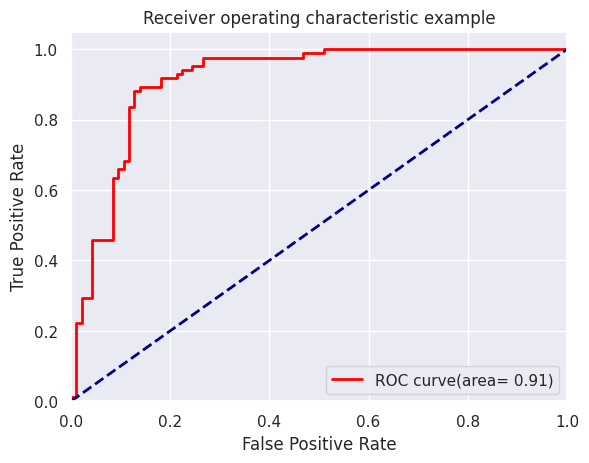

In [ ]:
score_Y_lr= lr.predict_proba(X_test)
fpr, tpr, _ = roc_curve(Y_test, score_Y_lr[:,1])
roc_auc = auc(fpr,tpr)

plt.figure()
lw=2
plt.plot(fpr,tpr,color='red',lw=lw,label='ROC curve(area= %0.2f)'% roc_auc)
plt.plot([0,1],[0,1],color='navy', lw=lw, linestyle='--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()